In [1]:
using PyPlot
using LsqFit

In [2]:
data1 = readdlm("ttv_planet1.txt")
data2 = readdlm("ttv_planet2.txt") ;

In [27]:
times1 = reshape(data1, length(data1))
times2 = reshape(data2, length(data2)) 

24-element Array{Float64,1}:
  8461.76
  8827.02
  9192.27
  9557.53
  9922.79
 10288.0 
 10653.3 
 11018.6 
 11383.8 
 11749.1 
 12114.3 
 12479.6 
 12844.8 
 13210.1 
 13575.4 
 13940.6 
 14305.9 
 14671.1 
 15036.4 
 15401.6 
 15766.9 
 16132.1 
 16497.4 
 16862.7 

In [25]:
data3 = linspace(0.0, 17328., 5)

linspace(0.0,17328.0,5)

In [26]:
times3 = reshape(data3, length(data3))

5-element Array{Float64,1}:
     0.0
  4332.0
  8664.0
 12996.0
 17328.0

In [21]:
period(times3)

4332.0

In [4]:
function period(times)
    dt = zeros(length(times)-1)
    for i in range(1, length(times)-1)
        dt[i] = times[i+1] - times[i]
    end
    return mean(dt)
end

period (generic function with 1 method)

In [5]:
println(period(times1))
println(period(times2))

224.

In [6]:
include("/Users/mlazz/Dropbox/UW/Spring2016/ASTR598/ExoJulia/Homework/hw4/compute_ttv.jl")

TTVFaster

70076641863517
365.25630708152175


In [23]:
function ttv_wrapper(time1, time2, p)
    #Parameters for planet 1
    mass_ratio1 = p[1]
    per1 = p[2]
    trans01 = p[3]
    ecosw1 = p[4]
    esinw1 = p[5]
    
    #Paramters for planet 2
    mass_ratio2 = p[6]
    per2 = p[7]
    trans02 = p[8]
    ecosw2 = p[9]
    esinw2 = p[10]
    
    #Make planets using TTVFaster.planet_planet.hk
    planet1 = TTVFaster.Planet_plane_hk(mass_ratio1, per1, trans01, ecosw1, esinw1)
    planet2 = TTVFaster.Planet_plane_hk(mass_ratio2, per2, trans02, ecosw2, esinw2)
    
    #Make empty arrays for ttv1 and ttv2 that will be created in the computer_ttv! function
    ttv1 = zeros(length(time1))
    ttv2 = zeros(length(time2))
    
    #Feed things into compute_ttv function
    jmax = 3
    TTVFaster.compute_ttv!(jmax, planet1, planet2, time1, time2, ttv1, ttv2)
    
    return ttv1, ttv2
end

ttv_wrapper (generic function with 1 method)

In [31]:
#Parameters used for feeding in planet 1 and planet 2
params12 = [3.0E-6, period(times1), 1, 0.05, 0.05, 3.0E-6, period(times2), 1, 0.05, 0.05]
ttv12, ttv21 = ttv_wrapper(times1, times2, params12)

([-0.00201465,-0.00222806,0.00325549,0.00324175,-7.23003e-5,-0.00344193,-0.00330586,0.00252533,0.00242295,-0.000227372  …  0.00315763,0.00309718,-9.07616e-5,-0.00352157,-0.00334646,0.00267147,0.00264511,-0.000161816,-0.000372817,-0.000824482],[5.4338e-5,-0.000555291,0.000588559,-0.0017833,0.00052558,0.00236311,-0.00121052,-6.37499e-7,0.000165697,-0.000589279  …  -0.0012313,3.0544e-5,0.000277967,-0.00062208,0.000443908,-0.00177024,0.000486459,0.00235072,-0.00125247,6.3001e-5])

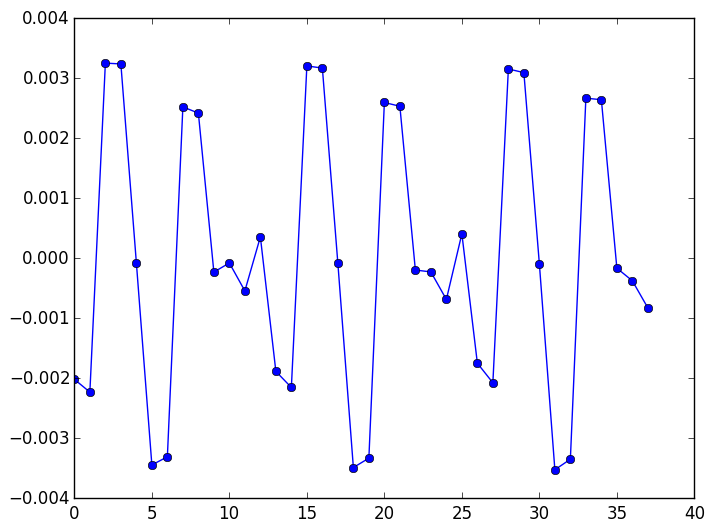

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31cdb6990>

In [32]:
plot(ttv12, "o-")

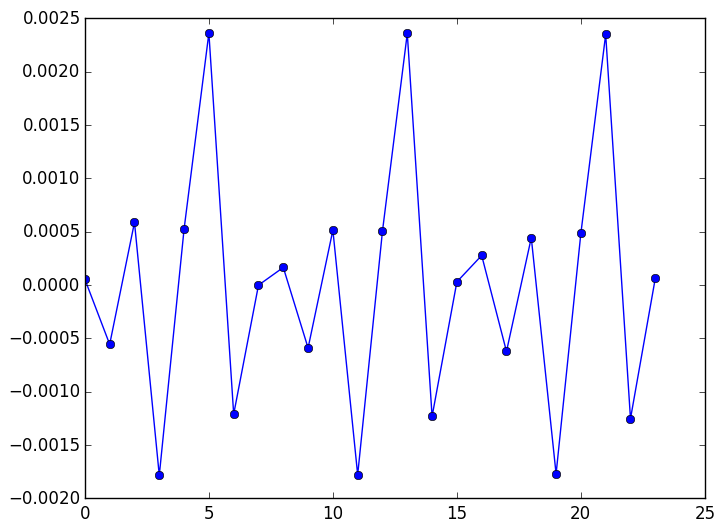

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31cfee6d0>

In [33]:
plot(ttv21, "o-")

In [34]:
#Set up params for planet 1 and planet 3
#Parameters for planet 1
   # mass_ratio1 = p[1]
    #per1 = p[2]
    #trans01 = p[3]
    #ecosw1 = p[4]
    #esinw1 = p[5]
    
    #Paramters for planet 2
    #mass_ratio2 = p[6]
    #per2 = p[7]
    #trans02 = p[8]
    #ecosw2 = p[9]
    #esinw2 = p[10]
params13 = [3.0E-6, period(times1), 1, 0.05, 0.05, 1.0E-3, period(times3), 1., 0.05, 0.05]
ttv13, ttv31 = ttv_wrapper(times1, times3, params13)

([-0.000331935,-0.000139164,-1.9264e-5,5.28476e-5,0.000120325,0.000228898,0.000408332,0.000651043,0.000898899,0.00105368  …  0.00102611,0.00105016,0.000839645,0.000408658,-0.000140223,-0.000654489,-0.00099688,-0.00110118,-0.000989167,-0.000745498],[-1.1748141783352398e-5,-0.0002684561556187021,0.0001146045800737704,0.0002267129157745163,-0.00020190288417703533])

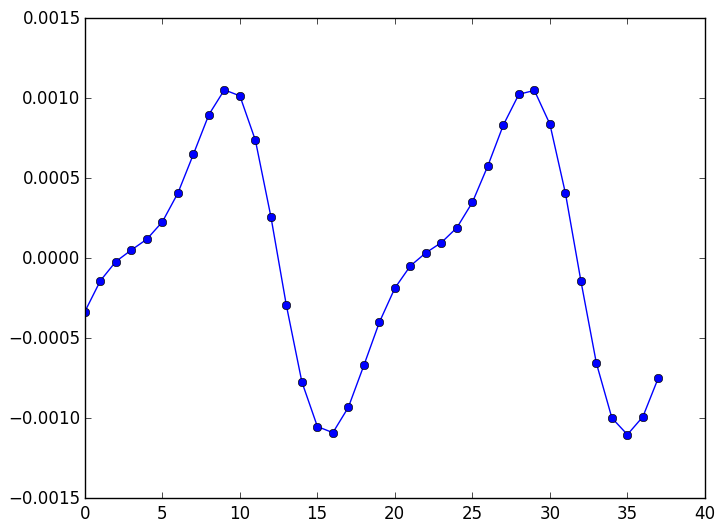

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31d226350>

In [35]:
plot(ttv13, "-o")

In [37]:
params23 = [3.0E-6, period(times2), 1, 0.05, 0.05, 1.0E-3, period(times3), 1., 0.05, 0.05]
ttv23, ttv32 = ttv_wrapper(times2, times3, params23) ;

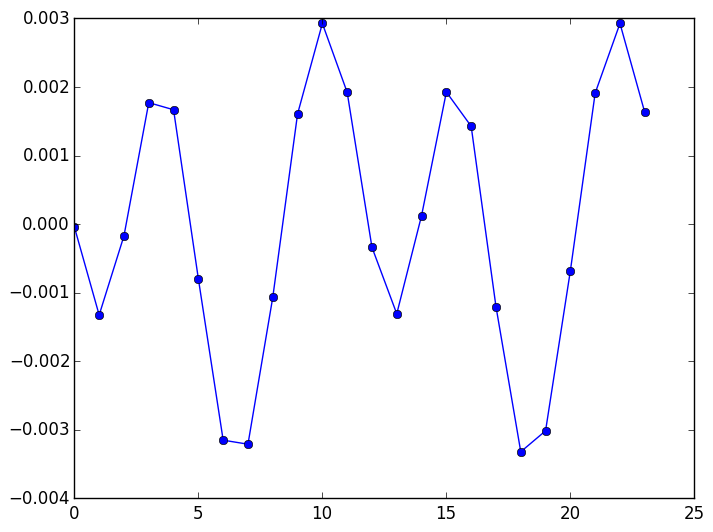

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31d466350>

In [38]:
plot(ttv23, "-o")

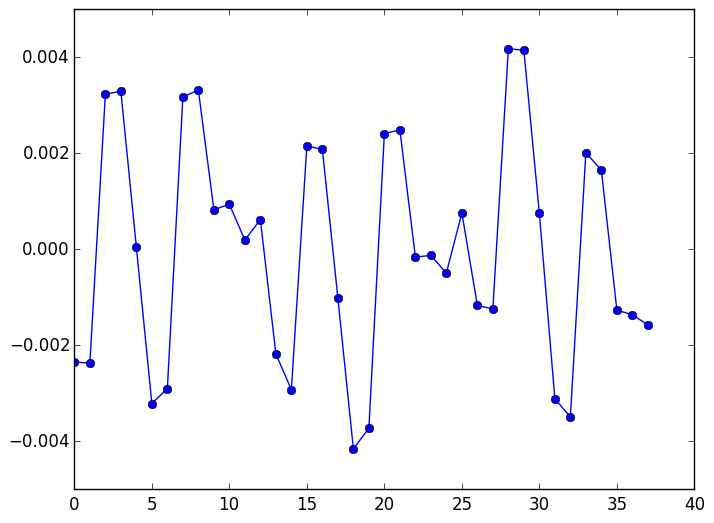

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31daf9490>

In [41]:
plot(ttv12+ttv13, "-o")